In [1]:
from fastai import *
from fastai.vision import *

In [2]:
classes = ['Mobile','Desktop']

In [3]:
folder = 'Mobile'
file = 'mobile.txt'

In [4]:
path = Path('Data/Images')
dest = path/folder
dest.mkdir(parents=True,exist_ok = True)

In [5]:
!cp ../input/* {path}

In [6]:
path.ls()

[PosixPath('Data/Images/desktop.txt'),
 PosixPath('Data/Images/mobile.txt'),
 PosixPath('Data/Images/Mobile')]

In [7]:
download_images(path/file,dest,max_pics=200)

Error https://imagex.kraftly.com/w_259/h_auto/m_box/https://nozzle.s3-ap-southeast-1.amazonaws.com/shop_64228/mrigank-xiaomi-mi-4i-mobile-1492485563lng-main.jpg HTTPSConnectionPool(host='imagex.kraftly.com', port=443): Read timed out. (read timeout=4)


In [8]:
folder = 'Desktop'
file = 'desktop.txt'

In [9]:
path = Path('Data/Images')
dest = path/folder
dest.mkdir(parents=True,exist_ok = True)

In [10]:
download_images(path/file,dest,max_pics=200)

Error https://media.hpshopping.in/wysiwyg/personal-laptops/images/spectre-img.png HTTPSConnectionPool(host='media.hpshopping.in', port=443): Read timed out. (read timeout=4)
Error https://media.hpshopping.in/wysiwyg/opp-laptops/hp-laptop.png HTTPSConnectionPool(host='media.hpshopping.in', port=443): Read timed out. (read timeout=4)


In [11]:
for c in classes:
    print(c)
    verify_images(path/c,delete=True,max_size=500)

Mobile


cannot identify image file <_io.BufferedReader name='Data/Images/Mobile/00000054.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Mobile/00000094.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Mobile/00000015.jpg'>
Desktop


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='Data/Images/Desktop/00000011.jpg'>


/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/opt/conda/lib/python3.6/site-packages/PIL/Image.py:918: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='Data/Images/Desktop/00000030.jpg'>
cannot identify image file <_io.BufferedReader name='Data/Images/Desktop/00000063.jpg'>


In [15]:
np.random.seed(5)
data = ImageDataBunch.from_folder(path,train='.',valid_pct=0.2,size=64,ds_tfms=get_transforms()).normalize(imagenet_stats)

In [17]:
print(data.classes)
print(data.c)
len(data.classes)

['Desktop', 'Mobile']
2


2

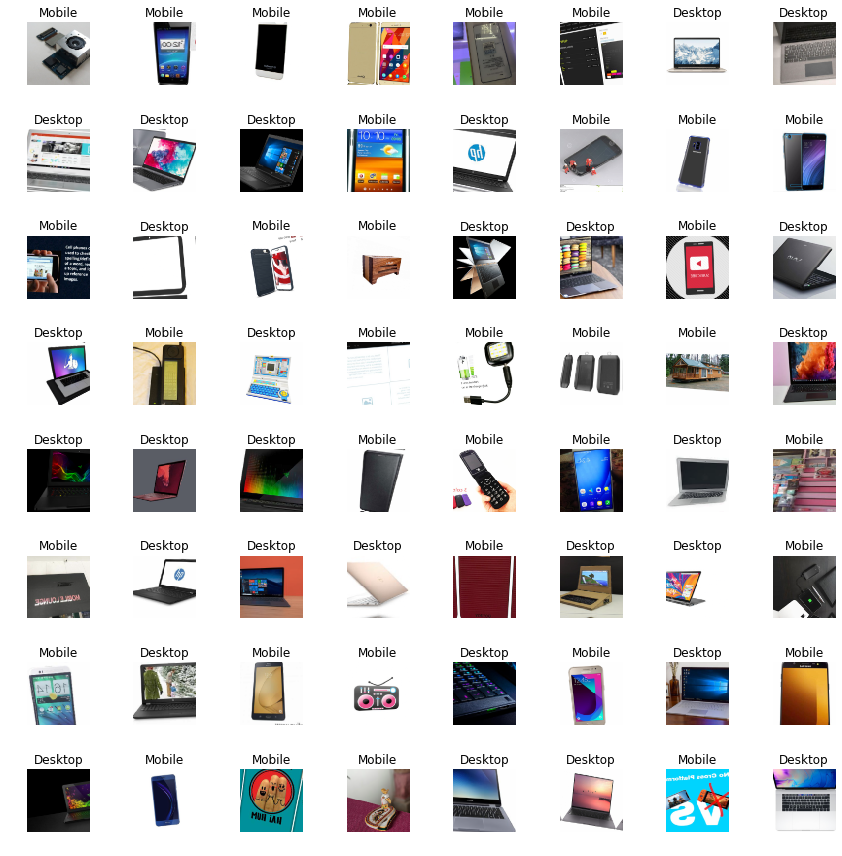

In [18]:
data.show_batch(9,figsize=(12,12))

In [20]:
learn = create_cnn(data,models.resnet18,metrics=accuracy)

/opt/conda/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [21]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.016936,0.536440,0.729730,00:03
1,0.885211,0.352582,0.864865,00:03
2,0.747282,0.315908,0.864865,00:02
3,0.650959,0.305750,0.891892,00:02


In [22]:
learn.save('Stage1')

In [24]:
intepret = ClassificationInterpretation.from_learner(learn)
loss,indx = intepret.top_losses()
len(data.valid_ds) == len(loss) == len(indx)

True

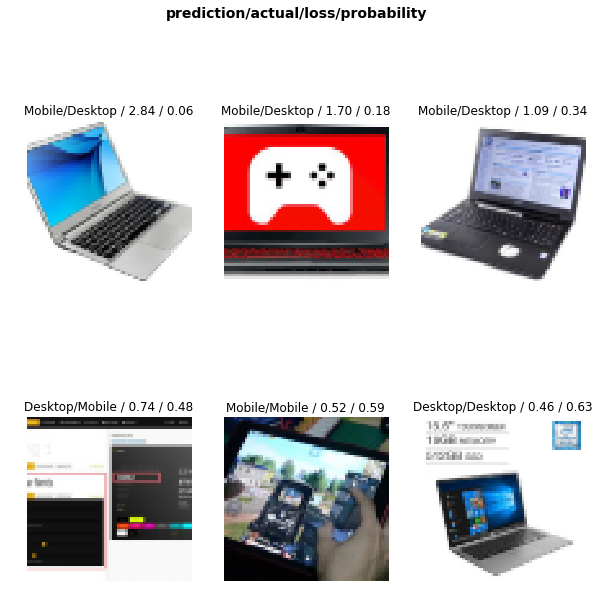

In [26]:
intepret.plot_top_losses(6,figsize=(10,10))

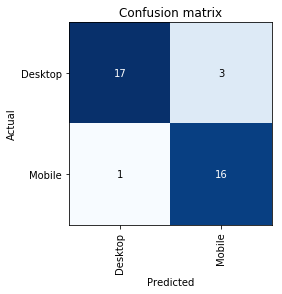

In [28]:
intepret.plot_confusion_matrix(figsize=(4,4))

In [29]:
learn.unfreeze()

In [30]:
learn.load('Stage1')

Learner(data=ImageDataBunch;

Train: LabelList (152 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Desktop,Desktop,Desktop,Desktop,Desktop
Path: Data/Images;

Valid: LabelList (37 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
Desktop,Desktop,Desktop,Mobile,Mobile
Path: Data/Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [31]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.505638,0.253028,0.891892,00:04
1,0.345773,0.279119,0.864865,00:04


In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


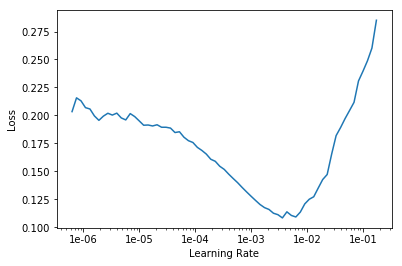

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,5e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.174015,0.259979,0.891892,00:04
1,0.152990,0.243780,0.891892,00:04
